In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools


In [2]:
importlib.reload(ExperimentClass)
importlib.reload(tools)
manip = ExperimentClass.Experiment("20230711_validation_PWM", "JTS", local = "IBPC")

In [3]:
#Here I perform the average of the recordings and crop the data to the interval of interest

records_JTS = tools.create_record_list("16-21")

records_PWM = tools.create_record_list("31-36")

#Intensity_JTS = [45.6, 310.3, 420.5, 696.2, 1251.8, 2000]

Intensity_PWM = [55.1, 172.9, 227.3, 293.5, 473.5, 867.3]

Intensity_JTS = Intensity_PWM

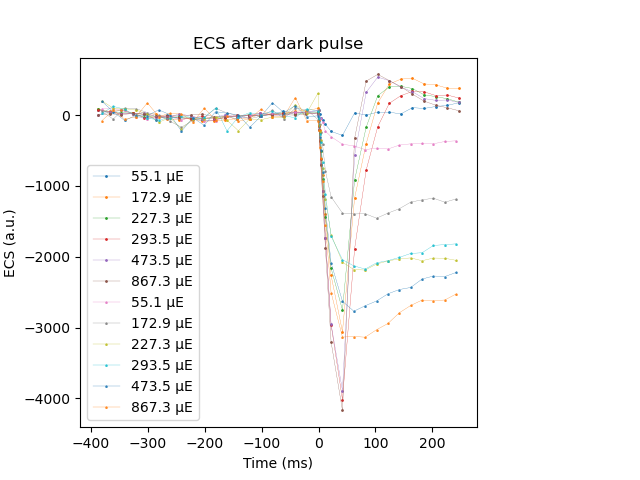

In [4]:
fig, ax = plt.subplots()
for i, k in enumerate(Intensity_JTS):
    ax.plot(manip.clean_times[i], manip.clean_data[i], 'o-', label = f"{k:n} µE", markersize = 1, linewidth = 0.2)
for i, k in enumerate(Intensity_PWM):   
    ax.plot(manip.clean_times[i+6], manip.clean_data[i+6], '^-', label = f"{k:n} µE", markersize = 1, linewidth = 0.2)
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 8.1)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("ECS (a.u.)")
ax.set_title("ECS after dark pulse")
ax.legend()
#ax.set_xlim(-25, 70)
plt.show()

# $E_{k}$ determination using PWM

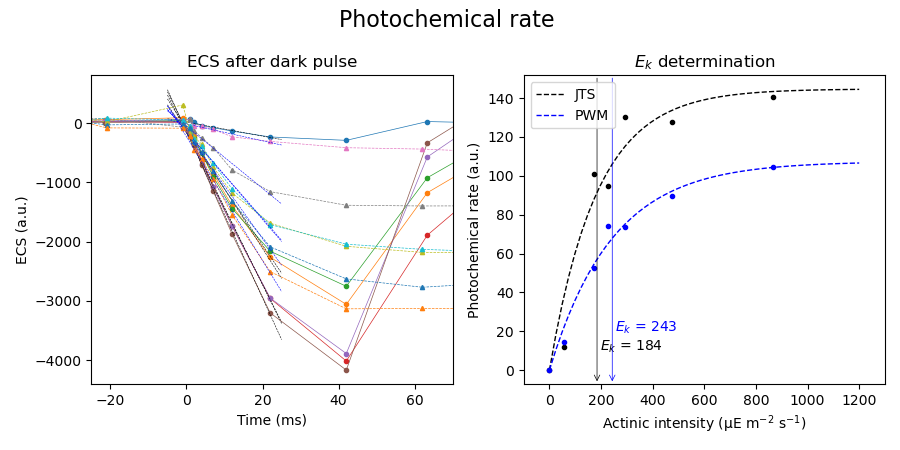

In [5]:
import math_functions as mf
importlib.reload(mf)
importlib.reload(tools)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (9,4.5))
figure_name = "Photochemical rate "
fig.suptitle(figure_name, fontsize = 16)

start = -5
stop = 25
num = 50
index_stop_fit = 26

xfit_JTS = []
yfit_JTS = []
param_JTS = []
vitesse_JTS = []
xdata_JTS = manip.clean_times[0][21:index_stop_fit]

xfit_PWM = []
yfit_PWM = []
param_PWM = []
vitesse_PWM = []
xdata_PWM = manip.clean_times[6][21:index_stop_fit]


for i, k in enumerate(Intensity_JTS):
    ax1.plot(manip.clean_times[i], manip.clean_data[i], 'o-', label = f"{k:n} µE", markersize = 3, linewidth = 0.5)
    
    ydata_JTS =  manip.clean_data[i][21:index_stop_fit]
    popt, x, y =  tools.lin_fit(xdata_JTS, ydata_JTS, start, stop, num)
    xfit_JTS.append(x)
    yfit_JTS.append(y)
    param_JTS.append(popt)
    ax1.plot(xfit_JTS[i],yfit_JTS[i], '--', color ='k', linewidth = 0.4)
    vitesse_JTS.append(-param_JTS[i][0])

for i, k in enumerate(Intensity_PWM):
    ax1.plot(manip.clean_times[i+6], manip.clean_data[i+6], '^--', label = f"{k:n} µE", markersize = 3, linewidth = 0.5)
    
    ydata_PWM =  manip.clean_data[i+6][21:index_stop_fit]
    popt, x, y =  tools.lin_fit(xdata_PWM, ydata_PWM, start, stop, num)
    xfit_PWM.append(x)
    yfit_PWM.append(y)
    param_PWM.append(popt)
    ax1.plot(xfit_PWM[i],yfit_PWM[i], '--', color ='b', linewidth = 0.4)
    vitesse_PWM.append(-param_PWM[i][0])
    
    
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("ECS (a.u.)")
ax1.set_title("ECS after dark pulse")
ax1.set_xlim(-25, 70)
    
Intensity_JTS_0 = np.insert(Intensity_JTS, 0, 0)
Intensity_PWM_0 = np.insert(Intensity_PWM, 0, 0)
vitesse_PWM.insert(0,0)
vitesse_JTS.insert(0,0)


Ek_fit = "exp_µE"
    
if Ek_fit == "exp_µE":   
    popt_JTS, xfit_JTS, yfit_JTS = tools.Ek_fit(Intensity_JTS_0, vitesse_JTS, 0, 1200, 50, p0 = [200, 140])
    ax2.plot(Intensity_JTS_0, vitesse_JTS,'o', color ='k', markersize = 3)
    ax2.plot(xfit_JTS, yfit_JTS, '--', color ='k', linewidth = 1, label = "JTS")
    Ek_JTS = popt_JTS[1]
    ax2.annotate("", xy=(Ek_JTS, ax2.get_ylim()[0]), xytext=(Ek_JTS, ax2.get_ylim()[1]), arrowprops=dict(arrowstyle="->", color="black", linewidth = 0.5))
    ax2.text(Ek_JTS + 10, 10, f"$E_k$ = {Ek_JTS:.0f}", fontsize = 10, color = "black")
    
    popt_PWM, xfit_PWM, yfit_PWM = tools.Ek_fit(Intensity_PWM_0, vitesse_PWM, 0, 1200, 50, p0 = [200, 140])
    ax2.plot(Intensity_PWM_0, vitesse_PWM,'o', color ='b', markersize = 3)
    ax2.plot(xfit_PWM, yfit_PWM, '--', color ='b', linewidth = 1, label = "PWM")
    Ek_PWM = popt_PWM[1]
    ax2.annotate("", xy=(Ek_PWM, ax2.get_ylim()[0]), xytext=(Ek_PWM, ax2.get_ylim()[1]), arrowprops=dict(arrowstyle="->", color="blue", linewidth = 0.5))
    ax2.text(Ek_PWM + 10, 20, f"$E_k$ = {Ek_PWM:.0f}", fontsize = 10, color = "blue")
    
    ax2.legend()

    
   


ax2.set_title("$E_{k}$ determination")
ax2.set_xlabel("Actinic intensity (µE m$^{-2}$ s$^{-1}$)")
#ax2.set_ylabel("Photochemical rate \n ($charge$ $separation$ $photosystem^{-1}$ $s^{-1}$)")
ax2.set_ylabel("Photochemical rate (a.u.)")
ax2.set_xlim([-100,1300])
# ax2.set_ylim([0,100])

fig.tight_layout()

plt.show()

fig_folder = manip.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

fig.savefig(fig_folder + "/" + figure_name + Ek_fit + ".png")

In [6]:
manip.clean_data

[array([  77.64063  ,   41.45068  ,   64.70996  ,   26.30371  ,
          11.67188  ,  -65.11475  ,   -5.92041  ,  -51.29688  ,
         -47.67334  ,  -76.53662  ,  -75.50732  ,  -26.75195  ,
         -49.87549  ,    0.6977539,  -17.73145  ,   11.9165   ,
          50.55615  ,   33.49121  ,   37.54688  ,   60.43213  ,
          71.83252  ,   19.896    ,  -39.00879  ,  -74.18945  ,
        -131.6118   , -230.8179   , -288.1899   ,   29.56641  ,
          -0.3061523,   40.49756  ,   40.03467  ,   15.31885  ,
         104.0801   ,   92.40674  ,  119.8999   ,  135.1787   ,
         172.8989   ]),
 array([   81.55396 ,    50.81787 ,    71.75403 ,    27.85498 ,
            9.953247,    17.08337 ,   -55.81104 ,   -64.43237 ,
          -46.68359 ,   -89.98889 ,   -81.19092 ,   -69.65771 ,
          -49.95313 ,   -41.50171 ,     4.947144,     8.46167 ,
           17.40918 ,    53.91602 ,    61.96667 ,    93.49963 ,
          -77.17859 ,  -215.3452  ,  -502.2118  ,  -849.9     ,
        -1395.27

NameError: name 'Intensity' is not defined

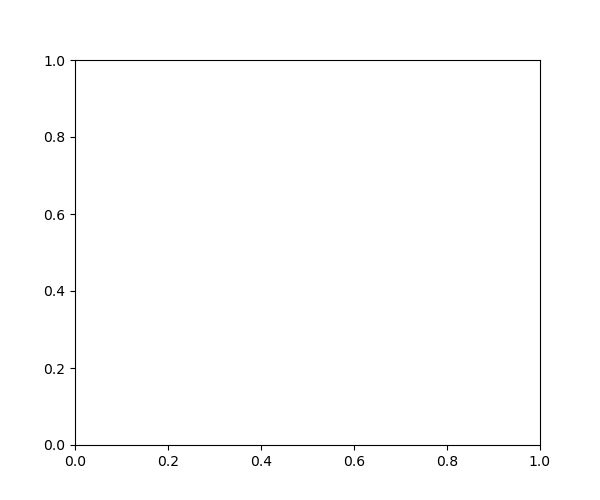

In [7]:
line = 2.5
marker = 10
labelsize = 18
legendfontsize = 14

fig, ax = plt.subplots(figsize=(6,5), facecolor='none')
fig_title = "Ek"


ax.plot(Intensity, vitesse, "o", markersize=marker, color = "black")
ax.plot(x1fit, y1fit, '--', color ='k',linewidth=line)
ax.set_xlabel("Actinic intensity (µEm$^{-2}$s$^{-1}$)", fontsize = labelsize)
ax.set_ylabel("Photochemical rate \n (elec. $photosystem^{-1}s^{-1}$)", fontsize = labelsize)
ax.set_ylim(-10, 140)
ax.set_xlim(-10, 100)

ax = plt.gca()
ax.tick_params(axis='both', which='both', width=2)

for label in ax.xaxis.get_ticklabels():
    label.set_fontsize(labelsize)
    
for label in ax.yaxis.get_ticklabels():
    label.set_fontsize(labelsize)

for spine in ax.spines.values():
    spine.set_linewidth(1.5)

fig.tight_layout()
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

fig.savefig(fig_folder + "ekposter.png", dpi=300)